# Présentation de la base de données:
Notre dataset a ete collecter à partir de [https://www.cbioportal.org/](https://www.cbioportal.org/) sous le nom de:**Pediatric Brain Cancer** .
On va essayer dans ce projet de développer un modèle prédictif pour la prise en charge du cancer du cerveau.

# Préparation des Données


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

### Exploration des **Features**.

In [ ]:
upload=files.upload()

Saving data.csv to data (5).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("data.csv",sep=';')
df.head()

,Study ID,Patient ID,Sample ID,AGE,Age at Chemotherapy Start,Age at Chemotherapy Stop,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Radiation Start,Age at Radiation Stop,...,Sex,Surgery,Timing Other Notes,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,brain_cptac_2020,PT_CWD717Q0,7316-101,9,NaN,NaN,3472,4008,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I
1,brain_cptac_2020,PT_5FR2YA6E,7316-109,11,NaN,NaN,4234,6510,NaN,NaN,...,Male,No,Not Reported,Modified Treatment,12 Month Update,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,IV
2,brain_cptac_2020,PT_RM5S859Q,7316-111,12,4630.0,4720.0,4519,6220,4556.0,4600.0,...,Female,Yes,Not Reported,New,Diagnosis,Treatment naive,Supratentorial,Occipital Lobe,Primary,III
3,brain_cptac_2020,PT_3X3MF8ZD,7316-114,30,11201.0,11242.0,11184,11881,11215.0,11247.0,...,Female,Yes,Not Reported,New,Diagnosis,Treatment naive,Midline,"Brain Stem- Pons,Brain Stem-Medulla,Spinal Cor...",Second Malignancy,IV
4,brain_cptac_2020,PT_ZVV78QP5,7316-117,9,NaN,NaN,3354,4499,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I


### Introduction des features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Study ID                                   218 non-null    object 
 1   Patient ID                                 218 non-null    object 
 2   Sample ID                                  218 non-null    object 
 3   AGE                                        218 non-null    int64  
 4   Age at Chemotherapy Start                  40 non-null     float64
 5   Age at Chemotherapy Stop                   38 non-null     float64
 6   Age at Initial Diagnosis                   218 non-null    int64  
 7   Age at Last Known Clinical Status          218 non-null    int64  
 8   Age at Radiation Start                     47 non-null     float64
 9   Age at Radiation Stop                      49 non-null     float64
 10  Age at Specimen Diagnosis 

In [ ]:
df['Updated Grade'].tail(7)

211         III/IV
212    Unavailable
213              I
214              I
215              I
216              I
217             IV
Name: Updated Grade, dtype: object

In [ ]:
df.replace("?", np.nan, inplace= True)
df.head()

,Study ID,Patient ID,Sample ID,AGE,Age at Chemotherapy Start,Age at Chemotherapy Stop,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Radiation Start,Age at Radiation Stop,...,Sex,Surgery,Timing Other Notes,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,brain_cptac_2020,PT_CWD717Q0,7316-101,9,NaN,NaN,3472,4008,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I
1,brain_cptac_2020,PT_5FR2YA6E,7316-109,11,NaN,NaN,4234,6510,NaN,NaN,...,Male,No,Not Reported,Modified Treatment,12 Month Update,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,IV
2,brain_cptac_2020,PT_RM5S859Q,7316-111,12,4630.0,4720.0,4519,6220,4556.0,4600.0,...,Female,Yes,Not Reported,New,Diagnosis,Treatment naive,Supratentorial,Occipital Lobe,Primary,III
3,brain_cptac_2020,PT_3X3MF8ZD,7316-114,30,11201.0,11242.0,11184,11881,11215.0,11247.0,...,Female,Yes,Not Reported,New,Diagnosis,Treatment naive,Midline,"Brain Stem- Pons,Brain Stem-Medulla,Spinal Cor...",Second Malignancy,IV
4,brain_cptac_2020,PT_ZVV78QP5,7316-117,9,NaN,NaN,3354,4499,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I


In [ ]:
missing_data= df.isnull()
print(missing_data)

     Study ID  Patient ID  Sample ID    AGE  Age at Chemotherapy Start  \
0       False       False      False  False                       True   
1       False       False      False  False                       True   
2       False       False      False  False                      False   
3       False       False      False  False                      False   
4       False       False      False  False                       True   
..        ...         ...        ...    ...                        ...   
213     False       False      False  False                       True   
214     False       False      False  False                       True   
215     False       False      False  False                       True   
216     False       False      False  False                       True   
217     False       False      False  False                       True   

     Age at Chemotherapy Stop  Age at Initial Diagnosis  \
0                        True                     Fa

Pour eliminer certeines features,on doit connaitre le nombre des valeurs manquantes dans chaque colonnes.


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Study ID
Study ID
False    218
Name: count, dtype: int64

Patient ID
Patient ID
False    218
Name: count, dtype: int64

Sample ID
Sample ID
False    218
Name: count, dtype: int64

AGE
AGE
False    218
Name: count, dtype: int64

Age at Chemotherapy Start
Age at Chemotherapy Start
True     178
False     40
Name: count, dtype: int64

Age at Chemotherapy Stop
Age at Chemotherapy Stop
True     180
False     38
Name: count, dtype: int64

Age at Initial Diagnosis
Age at Initial Diagnosis
False    218
Name: count, dtype: int64

Age at Last Known Clinical Status
Age at Last Known Clinical Status
False    218
Name: count, dtype: int64

Age at Radiation Start
Age at Radiation Start
True     171
False     47
Name: count, dtype: int64

Age at Radiation Stop
Age at Radiation Stop
True     169
False     49
Name: count, dtype: int64

Age at Specimen Diagnosis
Age at Specimen Diagnosis
False    218
Name: count, dtype: int64

Age Class
Age Class
False    218
Name: count, dtype: int64

BRAF_RELA Status
B

### Gérer les valeurs manquantes.

il y a des colonnes où les valeurs manquantes sont enormes et ils nous aiderons à rien, c'est pourquoi il vaut mieux les supprimer. Dans notre data les colonnes avec une proportion élevée de valeurs manquantes semblent être :


*   Age at Chemotherapy Start: 178 valeurs manquantes sur 218

* Age at Chemotherapy Stop: 180 valeurs manquantes sur 218
* Age at Radiation Start: 171 valeurs manquantes sur 218
* Age at Radiation Stop: 169 valeurs manquantes sur 218
* Chemotherapy Agents: 168 valeurs manquantes sur 218
* Chemotherapy Type: 170 valeurs manquantes sur 218
* Completed Radiation Dose: 165 valeurs manquantes sur 218
* Completed Total Radiation Dose: 167 valeurs manquantes sur 218
* Formulation: 171 valeurs manquantes sur 218
* H3F3A_CTNNB1 Status: 145 valeurs manquantes sur 218
* HGG_H3F3A Status: 193 valeurs manquantes sur 218
* LGG_BRAF Status: 125 valeurs manquantes sur 218
* Multiple Cancer Predispositions: 74 valeurs manquantes sur 218
* Protocol and Treatment Arm: 170 valeurs manquantes sur 218
* Radiation Site: 167 valeurs manquantes sur 218
* Radiation Type: 142 valeurs manquantes sur 218
* Timing Other Notes: 170 valeurs manquantes sur 218

In [ ]:
colonnes_a_supprimer = [
    'Age at Chemotherapy Start',
    'Age at Chemotherapy Stop',
    'Age at Radiation Start',
    'Age at Radiation Stop',
    'Chemotherapy Agents',
    'Chemotherapy Type',
    'Completed Radiation Dose',
    'Completed Total Radiation Dose',
    'Formulation',
    'H3F3A_CTNNB1 Status',
    'HGG_H3F3A Status',
    'LGG_BRAF Status',
    'Multiple Cancer Predispositions',
    'Protocol and Treatment Arm',
    'Radiation Site',
    'Radiation Type',
    'Timing Other Notes'
]

df = df.drop(columns=colonnes_a_supprimer)
df

,Study ID,Patient ID,Sample ID,AGE,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Specimen Diagnosis,Age Class,BRAF_RELA Status,BRAF Status,...,Sample Origin,Sex,Surgery,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,brain_cptac_2020,PT_CWD717Q0,7316-101,9,3472,4008,3472,[5-10),NaN,NaN,...,Initial CNS Tumor Surgery,Male,Yes,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I
1,brain_cptac_2020,PT_5FR2YA6E,7316-109,11,4234,6510,4234,[10-15),NaN,NaN,...,NaN,Male,No,Modified Treatment,12 Month Update,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,IV
2,brain_cptac_2020,PT_RM5S859Q,7316-111,12,4519,6220,4519,[10-15),RELA Fusion,RELA Fusion,...,Initial CNS Tumor Surgery,Female,Yes,New,Diagnosis,Treatment naive,Supratentorial,Occipital Lobe,Primary,III
3,brain_cptac_2020,PT_3X3MF8ZD,7316-114,30,11184,11881,11184,20+,NaN,NaN,...,Second malignancy,Female,Yes,New,Diagnosis,Treatment naive,Midline,"Brain Stem- Pons,Brain Stem-Medulla,Spinal Cor...",Second Malignancy,IV
4,brain_cptac_2020,PT_ZVV78QP5,7316-117,9,3354,4499,3354,[5-10),BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Male,Yes,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,brain_cptac_2020,PT_PGVQ4XRZ,7316-946,12,4513,5301,4513,[10-15),BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Male,Yes,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
214,brain_cptac_2020,PT_2WA5PM32,7316-949,1,565,3336,2927,[5-10),NaN,NaN,...,Recurrence surgery,Male,Yes,New,Diagnosis,Treatment naive,Suprasellar/Hypothalamic/Pituitary,Suprasellar/Hypothalamic/Pituitary,recurrence,I
215,brain_cptac_2020,PT_RFF7MKTC,7316-954,4,1818,2505,1818,"[0,5)",BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Female,Yes,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
216,brain_cptac_2020,PT_8XZY6MM1,7316-957,7,2810,3090,2810,[5-10),BRAF Wild Type,BRAF Wild Type,...,Initial CNS Tumor Surgery,Female,Yes,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I


Les variables:*BRAF_RELA Status*,
*BRAF Status*, *Chemotherapy*
*BRAF Status2*, *CTNNB1 Status*,*Ependymoma_RELA Status*, *Extent of Tumor Resection*, *Multiple Tumor Locations*, *Radiation*, *Sample Origin*, *Surgery* et *Tumor Location Condensed* sont des variables categorieles qui ont des valeurs manquantes pour remplacer ces champs manquantes on va utiliser la methode de **frequency**.

Pour savoir les valeurs utiliser dans ces colonnes on va utiliser: ".value_counts()"

In [ ]:
frequency_col=df.loc[:, ['BRAF_RELA Status', 'BRAF Status', 'BRAF Status2','Chemotherapy', 'CTNNB1 Status', 'Ependymoma_RELA Status',
    'Extent of Tumor Resection', 'Multiple Tumor Locations',
    'Radiation', 'Sample Origin', 'Surgery', 'Tumor Location Condensed','Multiple Medical Conditions']]
frequency_col.head(3)

,BRAF_RELA Status,BRAF Status,BRAF Status2,Chemotherapy,CTNNB1 Status,Ependymoma_RELA Status,Extent of Tumor Resection,Multiple Tumor Locations,Radiation,Sample Origin,Surgery,Tumor Location Condensed,Multiple Medical Conditions
0,NaN,NaN,NaN,No,NaN,NaN,Gross/Near total resection,No,No,Initial CNS Tumor Surgery,Yes,Temporal Lobe,No
1,NaN,NaN,NaN,Yes,NaN,NaN,NaN,No,No,NaN,No,Cerebellar,No
2,RELA Fusion,RELA Fusion,NaN,Yes,CTNNB1 WT,RELA Fusion,Gross/Near total resection,No,Yes,Initial CNS Tumor Surgery,Yes,Supratentorial,Yes


In [ ]:
for col in frequency_col.columns:
  print(frequency_col[col].value_counts())
  print("la valeur la plus commune est:", frequency_col[col].value_counts().idxmax())
  print("")

BRAF_RELA Status
BRAF fusion                      51
BRAF Wild Type                   34
RELA Wild Type                   24
BRAF p.V600E + BRAF p.T599dup    13
RELA Fusion                       8
Name: count, dtype: int64
la valeur la plus commune est: BRAF fusion

BRAF Status
BRAF fusion                      51
BRAF Wild Type                   34
RELA Wild Type                   24
BRAF p.V600E + BRAF p.T599dup    13
RELA Fusion                       8
Name: count, dtype: int64
la valeur la plus commune est: BRAF fusion

BRAF Status2
BRAF mutant       64
BRAF Wild Type    34
Name: count, dtype: int64
la valeur la plus commune est: BRAF mutant

Chemotherapy
No              136
Yes              48
Not Reported     22
Unavailable       3
Name: count, dtype: int64
la valeur la plus commune est: No

CTNNB1 Status
CTNNB1 WT        36
CTNNB1 Mutant    12
Name: count, dtype: int64
la valeur la plus commune est: CTNNB1 WT

Ependymoma_RELA Status
RELA Wild Type    24
RELA Fusion        8
Name:

on peut voir que la colonne **BRAF_RELA Status** et la colonne **BRAF Status** ont des valeurs communes et de meme nombre de fois, pour savoir si on doit laisser juste une seule colonne il faut savoir s'ils ont les memes valeurs au meme indice.

In [ ]:
val = (frequency_col['BRAF_RELA Status'] == frequency_col['BRAF Status']).all()

if val:
    print("Les colonnes BRAF_RELA Status et BRAF Status ont les mêmes valeurs.")
else:
    print("Les colonnes BRAF_RELA Status et BRAF Status ont des valeurs différentes.")

Les colonnes BRAF_RELA Status et BRAF Status ont des valeurs différentes.


Ansi on peut pas supprimer l'une de ces colonnes. Maintenant on doit remplacer les valeurs manquantes avec la valeur la plus frequentes.

In [ ]:
for col in frequency_col.columns:
    valeur_plus_frequente = frequency_col[col].value_counts().idxmax()
    df[col].fillna(valeur_plus_frequente, inplace=True)
df.head(5)

,Study ID,Patient ID,Sample ID,AGE,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Specimen Diagnosis,Age Class,BRAF_RELA Status,BRAF Status,...,Sample Origin,Sex,Surgery,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,brain_cptac_2020,PT_CWD717Q0,7316-101,9,3472,4008,3472,[5-10),BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Male,Yes,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I
1,brain_cptac_2020,PT_5FR2YA6E,7316-109,11,4234,6510,4234,[10-15),BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Male,No,Modified Treatment,12 Month Update,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,IV
2,brain_cptac_2020,PT_RM5S859Q,7316-111,12,4519,6220,4519,[10-15),RELA Fusion,RELA Fusion,...,Initial CNS Tumor Surgery,Female,Yes,New,Diagnosis,Treatment naive,Supratentorial,Occipital Lobe,Primary,III
3,brain_cptac_2020,PT_3X3MF8ZD,7316-114,30,11184,11881,11184,20+,BRAF fusion,BRAF fusion,...,Second malignancy,Female,Yes,New,Diagnosis,Treatment naive,Midline,"Brain Stem- Pons,Brain Stem-Medulla,Spinal Cor...",Second Malignancy,IV
4,brain_cptac_2020,PT_ZVV78QP5,7316-117,9,3354,4499,3354,[5-10),BRAF fusion,BRAF fusion,...,Initial CNS Tumor Surgery,Male,Yes,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I


In [ ]:
missing_data=df.isnull()

In [ ]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

Study ID
False    218
Name: count, dtype: int64

Patient ID
False    218
Name: count, dtype: int64

Sample ID
False    218
Name: count, dtype: int64

AGE
False    218
Name: count, dtype: int64

Age at Initial Diagnosis
False    218
Name: count, dtype: int64

Age at Last Known Clinical Status
False    218
Name: count, dtype: int64

Age at Specimen Diagnosis
False    218
Name: count, dtype: int64

Age Class
False    218
Name: count, dtype: int64

BRAF_RELA Status
False    218
Name: count, dtype: int64

BRAF Status
False    218
Name: count, dtype: int64

BRAF Status2
False    218
Name: count, dtype: int64

Cancer Predispositions
False    218
Name: count, dtype: int64

Cancer Type
False    218
Name: count, dtype: int64

Cancer Type Detailed
False    218
Name: count, dtype: int64

Chemotherapy
False    218
Name: count, dtype: int64

Clinical Status at Collection Event
False    218
Name: count, dtype: int64

CTNNB1 Status
False    218
Name: count, dtype: int64

DFS Months
False    211
True  

Pour les valeurs numeriques manquantes ont va utiliser la methode de **Mean**.

<h4>Calculer la valeur moyenne Pour les colonnes: OS Months,Mutation Count et DFS Months </h4>



In [ ]:
avg_os_months = df["OS Months"].astype("float").mean(axis=0)
avg_mutation_count = df["Mutation Count"].astype("float").mean(axis=0)
avg_dfs_months = df["DFS Months"].astype("float").mean(axis=0)

print("Moyenne des OS Months:", avg_os_months)
print("Moyenne des Mutation Count:", avg_mutation_count)
print("Moyenne des DFS Months:", avg_dfs_months)


Moyenne des OS Months: 45.824644549763036
Moyenne des Mutation Count: 44.93
Moyenne des DFS Months: 27.22748815165877


In [ ]:
df["OS Months"].fillna(avg_os_months, inplace=True)
df["Mutation Count"].fillna(avg_mutation_count, inplace=True)
df["DFS Months"].fillna(avg_dfs_months, inplace=True)

In [ ]:
df.isnull()

,Study ID,Patient ID,Sample ID,AGE,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Specimen Diagnosis,Age Class,BRAF_RELA Status,BRAF Status,...,Sample Origin,Sex,Surgery,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(218, 46)

### Valeur aberantes:

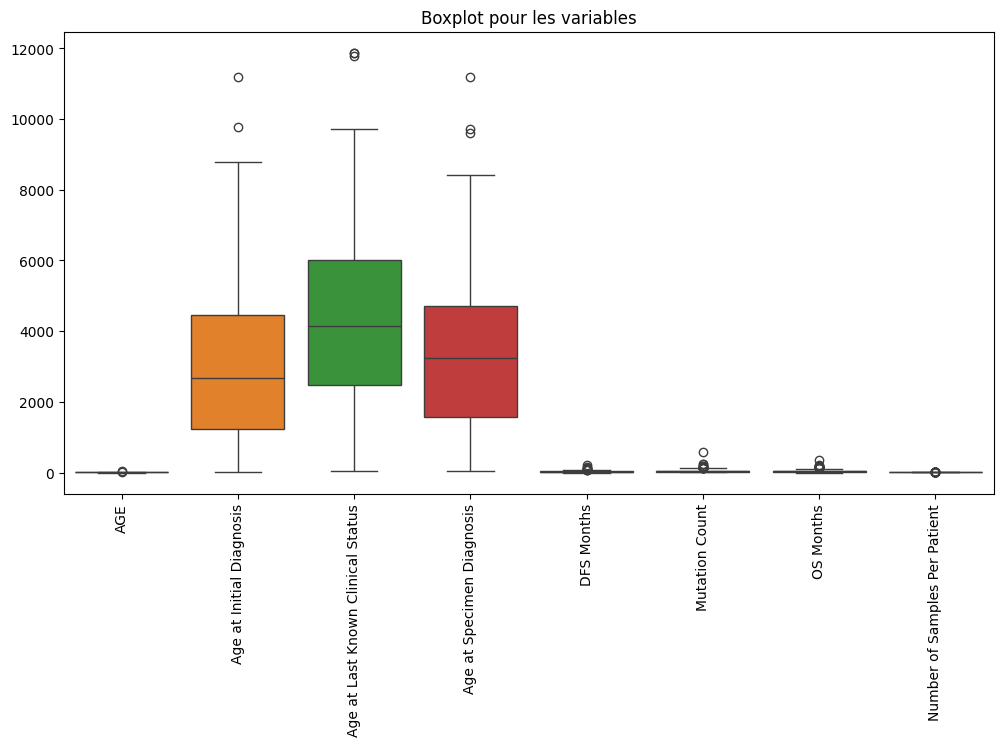

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot pour les variables')
plt.show()

In [ ]:
# Liste des colonnes à filtrer
cols_to_filter = ['Age at Initial Diagnosis', 'Age at Last Known Clinical Status', 'Age at Specimen Diagnosis']

# Boucle pour filtrer chaque colonne
for col in cols_to_filter:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtre basé sur l'IQR calculé
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Affichage de la nouvelle taille du DataFrame
print(f"Taille du DataFrame après le filtrage : {df.shape}")

Taille du DataFrame après le filtrage : (213, 46)


Maintenant qu'il y a plus de valeurs manquantes dans notre dataset on passe à **Sélection les Caractéristiques**

# Corrélation entre les variables:

In [ ]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'AGE',
       'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
       'Age at Specimen Diagnosis', 'Age Class', 'BRAF_RELA Status',
       'BRAF Status', 'BRAF Status2', 'Cancer Predispositions', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy',
       'Clinical Status at Collection Event', 'CTNNB1 Status', 'DFS Months',
       'DFS Status', 'Ependymoma_RELA Status', 'Ethnicity',
       'Extent of Tumor Resection', 'External Patient ID',
       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type',
       'Medical Conditions', 'Multiple Medical Conditions',
       'Multiple Tumor Locations', 'Mutation Count', 'Oncotree Code',
       'OS Months', 'OS Status', 'Race', 'Radiation', 'Sample Annotation',
       'Number of Samples Per Patient', 'Sample Origin', 'Sex', 'Surgery',
       'Treatment', 'Treatment Changed', 'Treatment Status',
       'Tumor Location Condensed', 'Tumor Tissue Site', 'Tumor Ty

In [ ]:
df.dtypes

Study ID                                      object
Patient ID                                    object
Sample ID                                     object
AGE                                            int64
Age at Initial Diagnosis                       int64
Age at Last Known Clinical Status              int64
Age at Specimen Diagnosis                      int64
Age Class                                     object
BRAF_RELA Status                              object
BRAF Status                                   object
BRAF Status2                                  object
Cancer Predispositions                        object
Cancer Type                                   object
Cancer Type Detailed                          object
Chemotherapy                                  object
Clinical Status at Collection Event           object
CTNNB1 Status                                 object
DFS Months                                   float64
DFS Status                                    

In [ ]:
# Select numerical columns
numerical_columns = ['AGE', 'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
                     'Age at Specimen Diagnosis', 'DFS Months', 'Mutation Count',
                     'OS Months', 'Number of Samples Per Patient']

# Create a new DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix
print(correlation_matrix)


                                        AGE  Age at Initial Diagnosis  \
AGE                                1.000000                  0.998576   
Age at Initial Diagnosis           0.998576                  1.000000   
Age at Last Known Clinical Status  0.832946                  0.830425   
Age at Specimen Diagnosis          0.908700                  0.906581   
DFS Months                         0.025285                  0.021149   
Mutation Count                    -0.058291                 -0.056300   
OS Months                         -0.198437                 -0.205374   
Number of Samples Per Patient     -0.195398                 -0.204431   

                                   Age at Last Known Clinical Status  \
AGE                                                         0.832946   
Age at Initial Diagnosis                                    0.830425   
Age at Last Known Clinical Status                           1.000000   
Age at Specimen Diagnosis                             

# Sélection les Caractéristiques

L'étape suivante sera de sélectionner les caractéristiques pertinentes pour prédiction l'évolution de la maladie du cancer.
On va utiliser **Analyse en composantes principales**

### Application de TruncatedSVD

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix


# Select categorical and numerical columns
categorical_columns = ['Age Class', 'BRAF_RELA Status', 'BRAF Status', 'BRAF Status2', 'Cancer Predispositions',
                       'Cancer Type', 'Cancer Type Detailed', 'Chemotherapy', 'Clinical Status at Collection Event',
                       'CTNNB1 Status', 'Ependymoma_RELA Status', 'Ethnicity', 'Extent of Tumor Resection',
                       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type', 'Medical Conditions',
                       'Multiple Medical Conditions', 'Multiple Tumor Locations', 'Oncotree Code', 'OS Status',
                       'Race', 'Radiation', 'Sample Annotation', 'Sample Origin', 'Sex', 'Surgery', 'Treatment',
                       'Treatment Changed', 'Treatment Status', 'Tumor Location Condensed', 'Tumor Tissue Site',
                       'Tumor Type']

numerical_columns = ['AGE', 'Age at Initial Diagnosis', 'Age at Last Known Clinical Status', 'Age at Specimen Diagnosis',
                     'DFS Months', 'Mutation Count', 'OS Months', 'Number of Samples Per Patient']

# Preprocessing pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Preprocessing pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_columns),
    ('numerical', numerical_pipeline, numerical_columns)
])

# Apply preprocessing pipeline
processed_data = preprocessor.fit_transform(df)

# Convert processed data to CSR matrix
processed_data_csr = csr_matrix(processed_data)

# Define a range of number of components to test
components_to_test = range(1, 20)  # Adjust as needed

# Loop through each number of components
for n_components in components_to_test:
    # Apply TruncatedSVD
    svd = TruncatedSVD(n_components=n_components)
    svd_result = svd.fit_transform(processed_data_csr)

    # Add target variable back to TruncatedSVD results DataFrame
    svd_df = pd.DataFrame(data=svd_result, columns=[f'PC{i+1}' for i in range(n_components)])
    svd_df['Updated Grade'] = df['Updated Grade'].values

    # Print or visualize TruncatedSVD results, or use them for further analysis
    print(f"Results for {n_components} components:")
    print(svd_df.head())


Results for 1 components:
        PC1 Updated Grade
0  4.515368             I
1  4.033672            IV
2  3.919417           III
3  4.822113             I
4  4.974053            II
Results for 2 components:
        PC1       PC2 Updated Grade
0  4.515368 -0.005212             I
1  4.033672  1.356748            IV
2  3.919417  1.651614           III
3  4.822113  0.444327             I
4  4.974053 -2.101213            II
Results for 3 components:
        PC1       PC2       PC3 Updated Grade
0  4.515368 -0.005226 -1.182362             I
1  4.033672  1.356752  0.173179            IV
2  3.919417  1.651611  0.354829           III
3  4.822113  0.444339 -0.166320             I
4  4.974053 -2.101205  0.374841            II
Results for 4 components:
        PC1       PC2       PC3       PC4 Updated Grade
0  4.515368 -0.005231 -1.182354 -0.109609             I
1  4.033672  1.356749  0.173336  0.460615            IV
2  3.919417  1.651613  0.355007  0.862154           III
3  4.822113  0.444334 -0

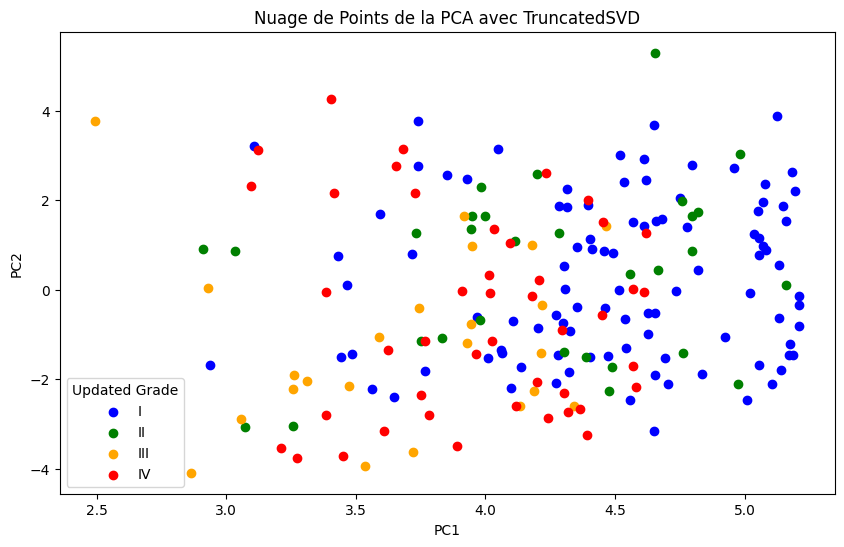

In [ ]:
import matplotlib.pyplot as plt


PC1_values = svd_df['PC1'].values
PC2_values = svd_df['PC2'].values
updated_grade = svd_df['Updated Grade'].values

# Créer un dictionnaire de mapping des niveaux de gravité à des couleurs
color_mapping = {'I': 'blue', 'II': 'green', 'III': 'orange', 'IV': 'red'}

# Création du nuage de points avec des couleurs basées sur 'Updated Grade'
plt.figure(figsize=(10, 6))
for grade, color in color_mapping.items():
    plt.scatter(PC1_values[updated_grade == grade], PC2_values[updated_grade == grade], c=color, label=grade)

# Ajout de titres et d'étiquettes
plt.title('Nuage de Points de la PCA avec TruncatedSVD')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Updated Grade')

# Affichage du nuage de points
plt.show()


# Développement du Modèle

### Régression



#### Régression Logistique:


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(svd_result, df['Updated Grade'], test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model
accuracy = logistic_model.score(X_test, y_test)
print(f"Accuracy of logistic regression model: {accuracy:.2f}")

Accuracy of logistic regression model: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Classification

#### Foret aleatoire

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming svd_result and df['Updated Grade'] are defined earlier in the code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(svd_result, df['Updated Grade'], test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Random Forest classifier: {accuracy:.2f}")


Accuracy of Random Forest classifier: 0.56


### Clustering

####  K-Means

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
kmeans.fit(svd_result)

# Add cluster labels to DataFrame
df['Cluster'] = kmeans.labels_

# Print the first few rows of the DataFrame with cluster labels
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           Study ID   Patient ID Sample ID  AGE  Age at Initial Diagnosis  \
0  brain_cptac_2020  PT_CWD717Q0  7316-101    9                      3472   
1  brain_cptac_2020  PT_5FR2YA6E  7316-109   11                      4234   
2  brain_cptac_2020  PT_RM5S859Q  7316-111   12                      4519   
4  brain_cptac_2020  PT_ZVV78QP5  7316-117    9                      3354   
5  brain_cptac_2020  PT_SMDEQVHJ  7316-119    1                       649   

   Age at Last Known Clinical Status  Age at Specimen Diagnosis Age Class  \
0                               4008                       3472    [5-10)   
1                               6510                       4234   [10-15)   
2                               6220                       4519   [10-15)   
4                               4499                       3354    [5-10)   
5                               1805                        675     [0,5)   

  BRAF_RELA Status  BRAF Status  ...     Sex Surgery           Treatment  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparation des données en features (X) et target variable (y)
X = processed_data  # Supposons que vous avez déjà vos données prétraitées
y = df['Updated Grade']  # Variable cible

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle d'arbre de décision
clf = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)


Précision du modèle : 0.6046511627906976


# Intégration de l'IAE

On va appliquer des techniques d'IAE aux modèles pour générer des
explications interprétables pour nos modeles.

### Pour la régression logistique :


In [ ]:
# Obtenez les coefficients de la régression logistique
coefficients = logistic_model.coef_
print("Coefficients de la régression logistique : ", coefficients)

Coefficients de la régression logistique :  [[ 5.38295796e-01  2.85903471e-01  1.47431747e-01 -9.17151515e-01
  -2.65047972e-01 -4.32440337e-01 -4.57003811e-01 -9.93323233e-02
   8.53626115e-01  3.81409346e-01  9.55467574e-01 -1.49539400e-01
   8.49122700e-01  7.78699226e-01 -4.35412722e-01 -2.40495527e-01
  -5.73949303e-02 -3.82152120e-01  8.25989130e-01]
 [ 2.15105335e-01  4.97538779e-01  6.21417253e-01 -2.12232541e-01
  -5.74638884e-01 -3.83024430e-01 -7.82541461e-01  3.62740375e-01
  -4.96768616e-02 -5.57309883e-01  5.17960611e-01 -1.05947897e-01
  -5.24011283e-01 -3.80734975e-01 -2.61214914e-01  2.72787398e-02
   4.95227232e-01 -4.92547736e-01 -3.28811142e-01]
 [ 1.47736739e-01  1.30227199e-01 -7.03040412e-02 -3.83445510e-01
  -3.14030805e-01  1.41551761e+00 -3.07858390e-02  4.11586329e-04
   1.87951849e-01  5.26214585e-01 -6.21725084e-02 -4.09170195e-01
   2.45570843e-01  1.18722853e-01  5.65556417e-01 -2.99393629e-01
  -2.78387763e-01  2.60489882e-01 -7.45962240e-01]
 [-4.943681

**Interpretation:**
Chaque ligne de la matrice correspond aux coefficients associés à une classe spécifique dans le modèle de régression logistique. Par exemple, la première ligne de la matrice représente les coefficients pour la première classe, la deuxième ligne représente les coefficients pour la deuxième classe, et ainsi de suite.

Chaque colonne de la matrice correspond à une caractéristique spécifique dans les données. Les coefficients dans chaque colonne indiquent l'impact de cette caractéristique sur la prédiction de la classe correspondante. Un coefficient positif indique que l'augmentation de la valeur de la caractéristique augmente la probabilité de la classe correspondante, tandis qu'un coefficient négatif indique que l'augmentation de la valeur de la caractéristique diminue la probabilité de la classe correspondante.

### Pour Random Forest :

In [ ]:
# Obtenez l'importance des caractéristiques du Random Forest
feature_importances = classifier.feature_importances_
print("Importance des caractéristiques du Random Forest : ", feature_importances)

Importance des caractéristiques du Random Forest :  [0.069024   0.04799604 0.06386836 0.09887772 0.03755612 0.17121361
 0.03752056 0.03251488 0.08078586 0.03316736 0.03805843 0.031902
 0.03009364 0.03586565 0.02898772 0.05040597 0.03397797 0.0346695
 0.0435146 ]


**Interpretation:**

* Chaque valeur dans le tableau représente l'importance relative d'une caractéristique spécifique.

* Plus la valeur est élevée, plus cette caractéristique est importante pour la prédiction du modèle.

==> Par exemple, si nous prenons la première caractéristique, son importance est de 0.0597. Cela signifie que cette caractéristique contribue à hauteur de 5.97% à la précision du modèle.

### Pour K-Means :

In [ ]:
# Obtenez les centres des clusters de K-Means
cluster_centers = kmeans.cluster_centers_
print("Centres des clusters de K-Means : ", cluster_centers)

Centres des clusters de K-Means :  [[ 4.31931839e+00  2.00078768e+00 -2.95320070e-01  2.07537859e-01
  -1.10040325e-01  1.31286403e-01 -1.62986139e-03  1.12563079e-01
  -3.44440356e-02  6.04382965e-02  6.44033571e-03 -9.60263448e-04
  -3.14111836e-02  1.11034079e-01 -7.16261653e-02  2.13553439e-02
   5.08965262e-02 -1.59918700e-02 -7.64821241e-02]
 [ 3.59767144e+00 -1.42045686e+00  1.73790037e+00  1.62247184e+00
  -6.55857092e-01  4.35319520e-02 -3.02888148e-01 -5.11511949e-02
  -2.75522414e-02  3.55015935e-02 -1.32504298e-01 -3.18136967e-02
   9.50975998e-02  6.85833070e-02 -8.70580599e-03 -1.72179882e-01
   1.28490382e-01 -1.28069509e-01  3.09115050e-02]
 [ 4.32566331e+00 -1.40660657e+00 -3.43459087e-01 -4.63726354e-01
   3.40180360e-01 -1.18625344e-01  9.84779695e-02 -2.54193894e-02
   1.07601389e-01 -1.02602017e-01  8.37972378e-03  7.37358115e-02
  -3.70889522e-03 -1.47470141e-01  4.58028843e-02  7.61850217e-02
  -5.51316363e-02  9.36444847e-02  7.99312909e-02]]


**Interpretation:**

* Chaque ligne de la matrice représente les coordonnées du centre d'un cluster spécifique.
* Chaque colonne de la matrice correspond à une caractéristique spécifique dans les données.

==>Par exemple, si nous prenons la première ligne de la matrice, elle représente les coordonnées du centre du premier cluster. Les valeurs dans cette ligne indiquent les positions relatives des centres des clusters par rapport à chaque caractéristique. De même, les valeurs dans les autres lignes représentent les positions relatives des centres des autres clusters.

# Évaluation :


Commençons par évaluer la performance des modèles à l'aide des métriques appropriées :

1.   Régression Logistique :
            Accuracy : 0.53

2.   Random Forest Classifier :
            Accuracy : 0.65

Maintenant, utilisons les sorties de l'IAE pour évaluer l'interprétabilité des modèles :


1.  Régression Logistique :
 * Nous pouvons interpréter les coefficients positifs comme indiquant une relation positive avec la gravité de la maladie, tandis que les coefficients négatifs indiquent une relation négative. Par exemple, un coefficient positif pour l'âge signifie que des valeurs plus élevées de l'âge sont associées à une gravité plus élevée de la maladie.
 * Cependant, avec une accuracy de 0.53, le modèle de régression logistique pourrait ne pas être suffisamment performant pour être utilisé seul dans des applications cliniques ou de prise de décision.
2.   Random Forest Classifier :
 * Les caractéristiques avec des valeurs d'importance plus élevées sont considérées comme plus importantes.
 * Avec une accuracy de 0.65, le Random Forest Classifier semble avoir une meilleure performance que la régression logistique, ce qui en fait un meilleur choix si l'interprétabilité est également importante.

### Conclusion
Bien que la régression logistique soit interprétable en termes des coefficients des caractéristiques, le Random Forest Classifier semble offrir une meilleure performance avec une accuracy plus élevée.